# **Import Libraries**

In [1]:
from RobotEnvClass import Q_Learning, SARSA_learning, Q_Learning_Randomness
import numpy as np
import matplotlib.pyplot as plt

# **Write some functions**

In [2]:
def find_path(Q):
    state = 6
    path = [state]
    #path = []
    end_state = False
    
    while not end_state:
        old_state = state
        state = np.where(Q[old_state,] == Q[old_state,].max())[0][0]
        if state not in path:
            path.append(state)
            if state == 35:
                end_state = True
                
        elif state == old_state:
            print("The Agent chose to stay in his position")
            end_state = True
            
        else:
            print("The Agent stucked into a loop")
            end_state = True
    
    
    return path

In [3]:
def calculate_rewards(R_matrix, path):
    r = 0
    steps = 0
    for idx in range(len(path)-1):
        r += R_matrix[path[idx], path[idx+1]]
        steps += 1
    return r,steps

In [4]:
def path_in_grids(path, dims):
    return [(cell//dims[1], cell%dims[0]) for cell in path]

In [9]:
def average_R_display(Rtot):
  Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
  plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])
  plt.title("Average Rewards per episode")
  plt.show()

In [10]:
def steps_plot(a_hist):
  y = []
  x = np.arange(len(a_hist))
  for his in a_hist:
    y.append(len(his))
    
  y_avg = np.cumsum(y) / np.arange(1, len(y) + 1)
  plt.plot(np.arange(20, len(y_avg)), y_avg[20:])
  plt.title("Average steps per episode")
  plt.show()

# **Experiments**

## **Experiments 1**

In [17]:
q_learning = Q_Learning()
q_learning.max_episodes = 1000
q_learning.rewards={'r_time':0,'r_pond':0,'r_croissant':0,'r_cogs':0,'r_work':20}
q_learning.tubes=[[(0, 0), (1,5)], [(1, 2), (4, 1)]]
q_learning.epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.9999, 'epsilon_decay2': 0.999}
print(q_learning.visualise_world())


X  X  X  X  X  X  X  X  X  X  X  X  X  
X  T0    .     .  X  .     .     .  X  
X                                   X  
X  S     .     T1 X  .     C     T0 X  
X                                X  X  
X  .     .     .  X  .     P     .  X  
X                                   X  
X  .     .     .     .     .     .  X  
X  X     X                          X  
X  .     T1    .     P     .     .  X  
X                                   X  
X  .     .     G  X  .     .     E  X  
X  X  X  X  X  X  X  X  X  X  X  X  X  

key:
S  = start location for agent
E  = end location for agent
.  = empty cell
X  = boundary or wall beetween cells
Tn = nth Tube start or end. Agent can travel between the two Tn in one time step
P  = pond: falling in is cold and wet
G  = cog: agent is rewarded for collecting
C  = croissant: agent is rewarded for collecting



In [18]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.6,0.9)

CPU times: user 3.33 s, sys: 95.4 ms, total: 3.43 s
Wall time: 3.32 s


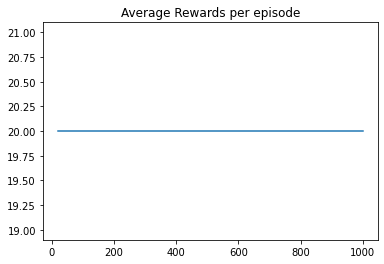

In [19]:
average_R_display(Rtot)

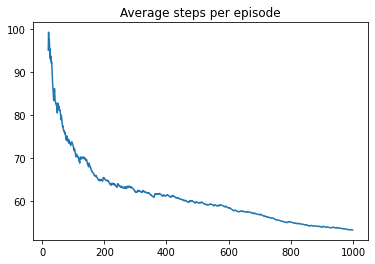

In [20]:
steps_plot(a_hist)

In [21]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 0, 11, 10, 16, 22, 23, 29, 35]
Path in grid coords:  [(1, 0), (0, 0), (1, 5), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5), (5, 5)]
Total Rewards:  20.0
Number of steps:  8


## **Experiments 2**

In [26]:
q_learning = Q_Learning()
q_learning.max_episodes = 5000
q_learning.rewards={'r_time':-1,'r_pond':0,'r_croissant':0,'r_cogs':0,'r_work':20}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (5, 2)]]
q_learning.epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.9999, 'epsilon_decay2': 0.999}

In [27]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.8,0.9)

CPU times: user 10.8 s, sys: 329 ms, total: 11.1 s
Wall time: 10.6 s


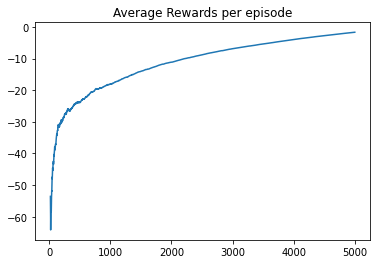

In [28]:
average_R_display(Rtot)

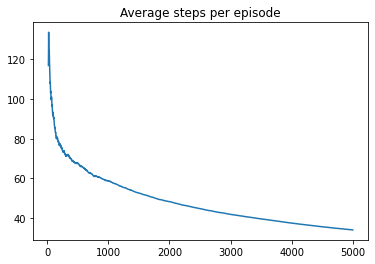

In [29]:
steps_plot(a_hist)

In [30]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 0, 11, 10, 16, 17, 23, 29, 35]
Path in grid coords:  [(1, 0), (0, 0), (1, 5), (1, 4), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5)]
Total Rewards:  15.0
Number of steps:  8


## **Experiments 3**

In [31]:
q_learning = Q_Learning()
q_learning.max_episodes = 10000
q_learning.rewards={'r_time':-5,'r_pond':0,'r_croissant':0,'r_cogs':0,'r_work':20}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (4, 1)]]
q_learning.epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.9999, 'epsilon_decay2': 0.999}

In [32]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.8,0.9)

CPU times: user 2min 29s, sys: 4.99 s, total: 2min 34s
Wall time: 2min 26s


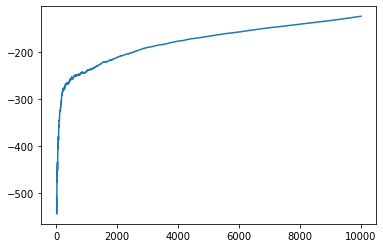

In [33]:
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])

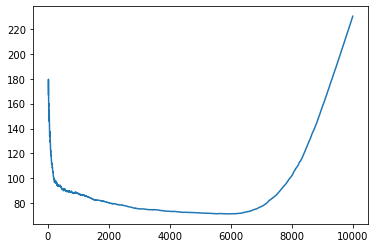

In [34]:
y = []
x = np.arange(len(a_hist))
for his in a_hist:
  y.append(len(his))
  
y_avg = np.cumsum(y) / np.arange(1, len(y) + 1)
plt.plot(np.arange(20, len(y_avg)), y_avg[20:])

In [35]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

The Agent chose to stay in his position
Path:  [6, 1]
Path in grid coords:  [(1, 0), (0, 1)]
Total Rewards:  nan
Number of steps:  1


## **Experiments 4**

In [36]:
q_learning = Q_Learning()
q_learning.max_episodes = 1000
q_learning.rewards={'r_time':-0.5,'r_pond':-5,'r_croissant':0,'r_cogs':0,'r_work':20}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (5, 2)]]
q_learning.epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.9999, 'epsilon_decay2': 0.999}

In [37]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.9,0.9)

CPU times: user 4.27 s, sys: 124 ms, total: 4.39 s
Wall time: 4.19 s


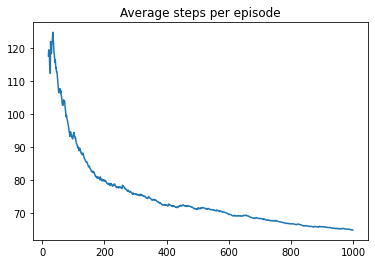

In [41]:
steps_plot(a_hist)

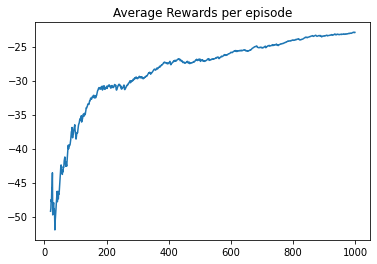

In [40]:
average_R_display(Rtot)

In [42]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 7, 13, 14, 20, 21, 22, 23, 29, 35]
Path in grid coords:  [(1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5)]
Total Rewards:  16.0
Number of steps:  9


## **Experiment 5**

In [43]:
q_learning = Q_Learning()
q_learning.max_episodes = 5000
q_learning.rewards={'r_time':-0.5,'r_pond':-5,'r_croissant':0,'r_cogs':0,'r_work':20}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (5, 3)]]
q_learning.epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.9999, 'epsilon_decay2': 0.999}

In [44]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.9,0.9)

CPU times: user 9.6 s, sys: 406 ms, total: 10 s
Wall time: 9.2 s


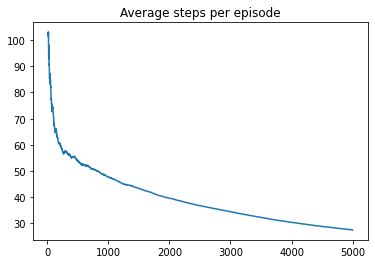

In [45]:
steps_plot(a_hist)

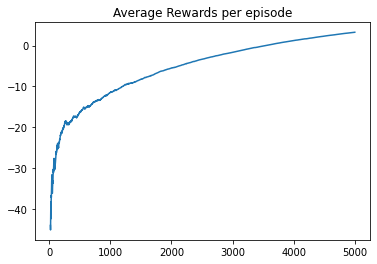

In [46]:
average_R_display(Rtot)

In [47]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 7, 8, 33, 34, 35]
Path in grid coords:  [(1, 0), (1, 1), (1, 2), (5, 3), (5, 4), (5, 5)]
Total Rewards:  18.0
Number of steps:  5


## **Experiment 6:** Limitation of Q-Learning

In [79]:
q_learning = Q_Learning()
q_learning.max_episodes = 100000
q_learning.rewards={'r_time':0,'r_pond':-1,'r_croissant':5,'r_cogs':50,'r_work':20}
q_learning.tubes=[[(0, 0), (1,5)], [(1, 2), (5, 1)]]
q_learning.epsilon_decays={'epsilon_threshold': 0.5, 'epsilon_decay1': 0.99999, 'epsilon_decay2': 0.9999}

In [80]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.8,0.9,0.9)

CPU times: user 14min 39s, sys: 29 s, total: 15min 8s
Wall time: 14min 24s


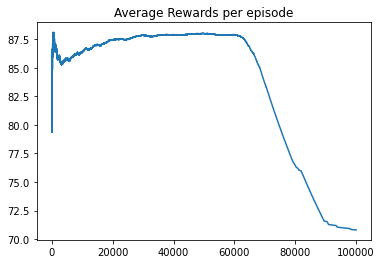

In [81]:
average_R_display(Rtot)

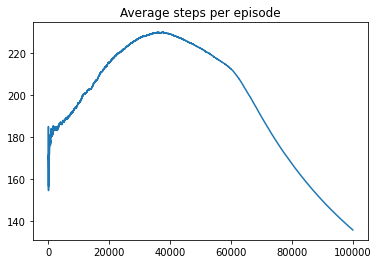

In [82]:
steps_plot(a_hist)

In [83]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 7, 8, 31, 32, 26, 27, 28, 29, 35]
Path in grid coords:  [(1, 0), (1, 1), (1, 2), (5, 1), (5, 2), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5)]
Total Rewards:  69.0
Number of steps:  9


In [98]:
state = 32

In [105]:
Q_hist[-1][26, 32]

12.878134690254875